In [ ]:
from os import chdir
chdir('/content/drive/MyDrive/pantanal.dev/artificial-intelligence')

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 30.0 MB/s eta 0:00:00


# Analisando o tokenizer

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('/content/drive/MyDrive/pantanal.dev/artificial-intelligence/trainings/bert-base-portuguese-cased_02')

text = "Exemplo de texto."
encoded_input = tokenizer.encode_plus(
    text,
    return_tensors='pt',      # Retorna tensores PyTorch
    #padding='max_length',     # Realiza preenchimento se necessário
    #truncation=True,          # Trunca a sequência se for mais longa que o comprimento máximo permitido
    #max_length=512            # Define o comprimento máximo da sequência
)

In [ ]:
len(encoded_input['input_ids'][0])

6

In [ ]:
def tokenize_text(text): return tokenizer.encode_plus(text, return_tensors='pt')['input_ids'][0]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset sem tratamento de stopwords

In [ ]:
infomoney_df = pd.read_csv('/content/drive/MyDrive/pantanal.dev/artificial-intelligence/datasets/infomoney/infomoney_news.csv')
infomoney_df

,tweet,urls,text
0,Secretário da Fazenda diz que medidas do gover...,https://www.infomoney.com.br/politica/secretar...,Secretário da Fazenda diz que medidas do gover...
1,"Trade hoje: Mesmo acima dos 100 mil, Ibovespa ...",https://www.infomoney.com.br/mercados/trade-ho...,"Trade hoje: Mesmo acima dos 100 mil, Ibovespa ..."
2,"Com alta de preços e crédito escasso, aumenta ...",https://www.infomoney.com.br/consumo/com-alta-...,"Com alta de preços e crédito escasso, aumenta ..."
3,Criptos tem valor? Veja três mitos que confund...,https://www.infomoney.com.br/onde-investir/cri...,Criptos têm valor? Veja três mitos que confund...
4,“Pelo menos há agora um aceno à disciplina fis...,https://www.infomoney.com.br/economia/pelo-men...,“Pelo menos há agora um aceno à disciplina fis...
...,...,...,...
18498,Auditoria do TCU não vê amparo legal em uso de...,https://www.infomoney.com.br/economia/auditori...,Auditoria do TCU não vê amparo legal em uso de...
18499,Ibovespa tem 5ª queda consecutiva e volta aos ...,https://www.infomoney.com.br/mercados/ibovespa...,Ibovespa tem 5ª queda consecutiva e volta aos ...
18500,Pessoas físicas vencem Wall Street e ação da G...,https://www.infomoney.com.br/mercados/pessoas-...,Pessoas físicas vencem Wall Street e ação da G...
18501,Sanofi produzirá mais de 100 milhões de doses ...,https://www.infomoney.com.br/economia/sanofi-p...,Sanofi produzirá mais de 100 milhões de doses ...


In [ ]:
infomoney_df['tokens'] = infomoney_df['text'].apply(tokenize_text)
infomoney_df

,tweet,urls,text,tokens
0,Secretário da Fazenda diz que medidas do gover...,https://www.infomoney.com.br/politica/secretar...,Secretário da Fazenda diz que medidas do gover...,"[tensor(101), tensor(8965), tensor(180), tenso..."
1,"Trade hoje: Mesmo acima dos 100 mil, Ibovespa ...",https://www.infomoney.com.br/mercados/trade-ho...,"Trade hoje: Mesmo acima dos 100 mil, Ibovespa ...","[tensor(101), tensor(1446), tensor(272), tenso..."
2,"Com alta de preços e crédito escasso, aumenta ...",https://www.infomoney.com.br/consumo/com-alta-...,"Com alta de preços e crédito escasso, aumenta ...","[tensor(101), tensor(761), tensor(2729), tenso..."
3,Criptos tem valor? Veja três mitos que confund...,https://www.infomoney.com.br/onde-investir/cri...,Criptos têm valor? Veja três mitos que confund...,"[tensor(101), tensor(5158), tensor(12441), ten..."
4,“Pelo menos há agora um aceno à disciplina fis...,https://www.infomoney.com.br/economia/pelo-men...,“Pelo menos há agora um aceno à disciplina fis...,"[tensor(101), tensor(1112), tensor(6187), tens..."
...,...,...,...,...
18498,Auditoria do TCU não vê amparo legal em uso de...,https://www.infomoney.com.br/economia/auditori...,Auditoria do TCU não vê amparo legal em uso de...,"[tensor(101), tensor(15103), tensor(2138), ten..."
18499,Ibovespa tem 5ª queda consecutiva e volta aos ...,https://www.infomoney.com.br/mercados/ibovespa...,Ibovespa tem 5ª queda consecutiva e volta aos ...,"[tensor(101), tensor(7077), tensor(1281), tens..."
18500,Pessoas físicas vencem Wall Street e ação da G...,https://www.infomoney.com.br/mercados/pessoas-...,Pessoas físicas vencem Wall Street e ação da G...,"[tensor(101), tensor(20298), tensor(10234), te..."
18501,Sanofi produzirá mais de 100 milhões de doses ...,https://www.infomoney.com.br/economia/sanofi-p...,Sanofi produzirá mais de 100 milhões de doses ...,"[tensor(101), tensor(2936), tensor(6288), tens..."


In [ ]:
infomoney_df['tokens_count'] = infomoney_df['tokens'].apply(len)
infomoney_df

,tweet,urls,text,tokens,tokens_count
0,Secretário da Fazenda diz que medidas do gover...,https://www.infomoney.com.br/politica/secretar...,Secretário da Fazenda diz que medidas do gover...,"[tensor(101), tensor(8965), tensor(180), tenso...",429
1,"Trade hoje: Mesmo acima dos 100 mil, Ibovespa ...",https://www.infomoney.com.br/mercados/trade-ho...,"Trade hoje: Mesmo acima dos 100 mil, Ibovespa ...","[tensor(101), tensor(1446), tensor(272), tenso...",793
2,"Com alta de preços e crédito escasso, aumenta ...",https://www.infomoney.com.br/consumo/com-alta-...,"Com alta de preços e crédito escasso, aumenta ...","[tensor(101), tensor(761), tensor(2729), tenso...",1399
3,Criptos tem valor? Veja três mitos que confund...,https://www.infomoney.com.br/onde-investir/cri...,Criptos têm valor? Veja três mitos que confund...,"[tensor(101), tensor(5158), tensor(12441), ten...",1790
4,“Pelo menos há agora um aceno à disciplina fis...,https://www.infomoney.com.br/economia/pelo-men...,“Pelo menos há agora um aceno à disciplina fis...,"[tensor(101), tensor(1112), tensor(6187), tens...",1182
...,...,...,...,...,...
18498,Auditoria do TCU não vê amparo legal em uso de...,https://www.infomoney.com.br/economia/auditori...,Auditoria do TCU não vê amparo legal em uso de...,"[tensor(101), tensor(15103), tensor(2138), ten...",991
18499,Ibovespa tem 5ª queda consecutiva e volta aos ...,https://www.infomoney.com.br/mercados/ibovespa...,Ibovespa tem 5ª queda consecutiva e volta aos ...,"[tensor(101), tensor(7077), tensor(1281), tens...",2911
18500,Pessoas físicas vencem Wall Street e ação da G...,https://www.infomoney.com.br/mercados/pessoas-...,Pessoas físicas vencem Wall Street e ação da G...,"[tensor(101), tensor(20298), tensor(10234), te...",1195
18501,Sanofi produzirá mais de 100 milhões de doses ...,https://www.infomoney.com.br/economia/sanofi-p...,Sanofi produzirá mais de 100 milhões de doses ...,"[tensor(101), tensor(2936), tensor(6288), tens...",877


In [ ]:
mean_value = np.mean(infomoney_df['tokens_count'])
mean_value

1085.6477328000865

In [ ]:
median_value = int(np.median(infomoney_df['tokens_count']))
median_value

786

In [ ]:
min_value = np.min(infomoney_df['tokens_count'])
min_value

104

In [ ]:
max_value = np.max(infomoney_df['tokens_count'])
max_value

21005

In [ ]:
x = range(0, infomoney_df.shape[0])

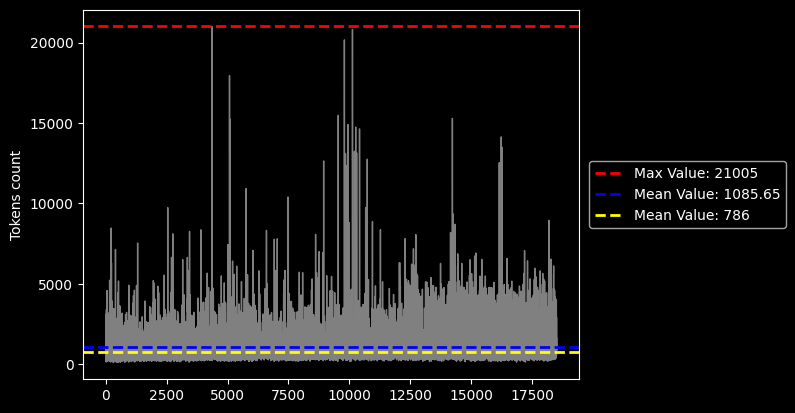

In [ ]:
with plt.style.context('dark_background'):
    plt.plot(x, infomoney_df['tokens_count'], color='gray', linewidth=1)
    plt.axhline(y=max_value, linestyle='--', color='red', label=f'Max Value: {max_value}', linewidth=2)
    plt.axhline(y=mean_value, linestyle='--', color='blue', label=f'Mean Value: {mean_value:.2f}', linewidth=2)
    plt.axhline(y=median_value, linestyle='--', color='yellow', label=f'Mean Value: {median_value}', linewidth=2)

    plt.title('Tokens count - Dataset com stopwords')
    plt.legend(bbox_to_anchor=(1.02, 0.5), loc="center left", borderaxespad=0)
    plt.ylabel('Tokens count')
plt.show()

## Dataset com tratamento de stopwords

In [ ]:
infomoney_df = pd.read_csv('/content/drive/MyDrive/pantanal.dev/artificial-intelligence/datasets/infomoney/infomoney_news_labelled_preprocessed.csv')
infomoney_df

,text,label
0,Secretário Fazenda diz medidas governo abrirão...,2
1,"Trade hoje : acima 100 mil , Ibovespa segue te...",0
2,"alta preços crédito escasso , aumenta busca ca...",1
3,"“ menos agora aceno disciplina fiscal ” , diz ...",1
4,IR 2023 : Posso ficar declarar bem vendido fal...,1
...,...,...
1326,Lojas Renner ( LREN3 ) reporta números fracos ...,1
1327,Lula volta sinalizar pode discutir autonomia B...,1
1328,Lula sobre Campos Neto : posso influir reduzir...,0
1329,Embraer ( EMBR3 ) entrega 80 jatos 4º trimestr...,2


In [ ]:
infomoney_df['tokens'] = infomoney_df['text'].apply(tokenize_text)
infomoney_df

,text,label,tokens
0,Secretário Fazenda diz medidas governo abrirão...,2,"[tensor(101), tensor(8965), tensor(8146), tens..."
1,"Trade hoje : acima 100 mil , Ibovespa segue te...",0,"[tensor(101), tensor(1446), tensor(272), tenso..."
2,"alta preços crédito escasso , aumenta busca ca...",1,"[tensor(101), tensor(2729), tensor(8731), tens..."
3,"“ menos agora aceno disciplina fiscal ” , diz ...",1,"[tensor(101), tensor(1112), tensor(1528), tens..."
4,IR 2023 : Posso ficar declarar bem vendido fal...,1,"[tensor(101), tensor(290), tensor(22322), tens..."
...,...,...,...
1326,Lojas Renner ( LREN3 ) reporta números fracos ...,1,"[tensor(101), tensor(20872), tensor(22281), te..."
1327,Lula volta sinalizar pode discutir autonomia B...,1,"[tensor(101), tensor(11124), tensor(1359), ten..."
1328,Lula sobre Campos Neto : posso influir reduzir...,0,"[tensor(101), tensor(11124), tensor(498), tens..."
1329,Embraer ( EMBR3 ) entrega 80 jatos 4º trimestr...,2,"[tensor(101), tensor(21277), tensor(140), tens..."


In [ ]:
infomoney_df['tokens_count'] = infomoney_df['tokens'].apply(len)
infomoney_df

,text,label,tokens,tokens_count
0,Secretário Fazenda diz medidas governo abrirão...,2,"[tensor(101), tensor(8965), tensor(8146), tens...",291
1,"Trade hoje : acima 100 mil , Ibovespa segue te...",0,"[tensor(101), tensor(1446), tensor(272), tenso...",623
2,"alta preços crédito escasso , aumenta busca ca...",1,"[tensor(101), tensor(2729), tensor(8731), tens...",980
3,"“ menos agora aceno disciplina fiscal ” , diz ...",1,"[tensor(101), tensor(1112), tensor(1528), tens...",748
4,IR 2023 : Posso ficar declarar bem vendido fal...,1,"[tensor(101), tensor(290), tensor(22322), tens...",430
...,...,...,...,...
1326,Lojas Renner ( LREN3 ) reporta números fracos ...,1,"[tensor(101), tensor(20872), tensor(22281), te...",1037
1327,Lula volta sinalizar pode discutir autonomia B...,1,"[tensor(101), tensor(11124), tensor(1359), ten...",241
1328,Lula sobre Campos Neto : posso influir reduzir...,0,"[tensor(101), tensor(11124), tensor(498), tens...",329
1329,Embraer ( EMBR3 ) entrega 80 jatos 4º trimestr...,2,"[tensor(101), tensor(21277), tensor(140), tens...",305


In [ ]:
mean_value = np.mean(infomoney_df['tokens_count'])
mean_value

502.54019534184823

In [ ]:
median_value = int(np.median(infomoney_df['tokens_count']))
median_value

455

In [ ]:
min_value = np.min(infomoney_df['tokens_count'])
min_value

79

In [ ]:
max_value = np.max(infomoney_df['tokens_count'])
max_value

1557

In [ ]:
x = range(0, infomoney_df.shape[0])

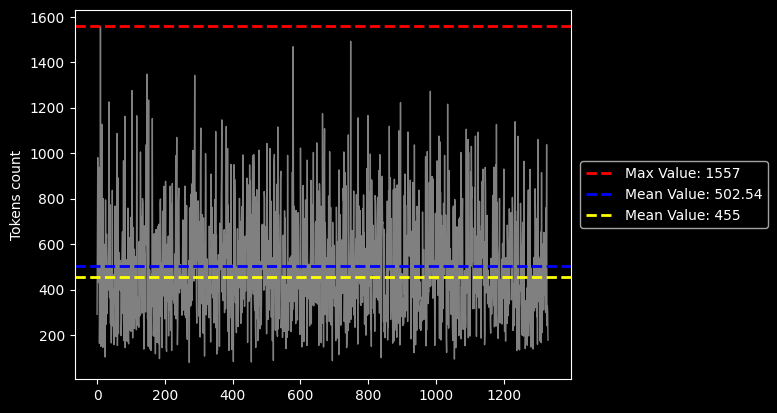

In [ ]:
with plt.style.context('dark_background'):
    plt.plot(x, infomoney_df['tokens_count'], color='gray', linewidth=1)
    plt.axhline(y=max_value, linestyle='--', color='red', label=f'Max Value: {max_value}', linewidth=2)
    plt.axhline(y=mean_value, linestyle='--', color='blue', label=f'Mean Value: {mean_value:.2f}', linewidth=2)
    plt.axhline(y=median_value, linestyle='--', color='yellow', label=f'Mean Value: {median_value}', linewidth=2)

    plt.title('Tokens count - Dataset se, stopwords')
    plt.legend(bbox_to_anchor=(1.02, 0.5), loc="center left", borderaxespad=0)
    plt.ylabel('Tokens count')
plt.show()